# Imports 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# Loading Dataset 

In [2]:
student_data = pd.read_csv(r'C:\Users\Desktop\USF-DS\educationstats.csv')

In [3]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 41 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Unnamed: 0                                      4424 non-null   int64  
 1   Marital status                                  4424 non-null   int64  
 2   Application mode                                4424 non-null   int64  
 3   Application order                               4424 non-null   int64  
 4   Course                                          4424 non-null   int64  
 5   Daytime/evening attendance	                     4424 non-null   int64  
 6   Previous qualification                          4424 non-null   int64  
 7   Previous qualification (grade)                  4424 non-null   float64
 8   Nacionality                                     4424 non-null   int64  
 9   Mother's qualification                   

In [4]:
student_data.describe()

,Unnamed: 0,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Adj net enrollment of lower secondary,Tertiary educ enrollment(all programs)
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4.424000e+03
mean,2211.500000,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,...,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,85.080939,4.387710e+05
std,1277.243125,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,...,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,2.541158,7.290486e+05
min,0.000000,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,16.120781,1.339700e+04
25%,1105.750000,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,...,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,85.185539,3.622000e+05
50%,2211.500000,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,...,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,85.185539,3.622000e+05
75%,3317.250000,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,...,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,85.185539,3.622000e+05
max,4423.000000,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,...,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,99.405693,8.072146e+06


In [5]:
student_data.value_counts('Country Name')

Country Name
Portugal          4314
Brazil              38
Soa Tome            14
Cabo Verde          13
Spain               13
Guinea               5
Moldova              3
Ukraine              3
Italy                3
Russia               2
Romania              2
Anogola              2
Mozambique           2
Mexico               2
Germany              2
Netherlands          1
Lithuania            1
Cuba                 1
Turkey               1
Colombia             1
United Kingdom       1
dtype: int64

# Exploring the Data 

###### National Education Stats 

In [6]:
student_success = student_data.set_index('Country Name')

In [7]:
student_success.head()

,Unnamed: 0,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Adj net enrollment of lower secondary,Tertiary educ enrollment(all programs)
Country Name,,,,,,,,,,,,,,,,,,,,,
Portugal,0,1,17,5,171,1,1,122.0,1,19,...,0,0,0.000000,0,10.8,1.4,1.74,Dropout,85.185539,362200.0
Portugal,1,1,15,1,9254,1,1,160.0,1,1,...,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,85.185539,362200.0
Portugal,2,1,1,5,9070,1,1,122.0,1,37,...,0,0,0.000000,0,10.8,1.4,1.74,Dropout,85.185539,362200.0
Portugal,3,1,17,2,9773,1,1,122.0,1,38,...,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,85.185539,362200.0
Portugal,4,2,39,1,8014,0,1,100.0,1,37,...,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,85.185539,362200.0


In [8]:
student_success.rename(columns = {'Unnamed: 0':'Student ID'}, inplace = True)
student_success.head()

,Student ID,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Adj net enrollment of lower secondary,Tertiary educ enrollment(all programs)
Country Name,,,,,,,,,,,,,,,,,,,,,
Portugal,0,1,17,5,171,1,1,122.0,1,19,...,0,0,0.000000,0,10.8,1.4,1.74,Dropout,85.185539,362200.0
Portugal,1,1,15,1,9254,1,1,160.0,1,1,...,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,85.185539,362200.0
Portugal,2,1,1,5,9070,1,1,122.0,1,37,...,0,0,0.000000,0,10.8,1.4,1.74,Dropout,85.185539,362200.0
Portugal,3,1,17,2,9773,1,1,122.0,1,38,...,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,85.185539,362200.0
Portugal,4,2,39,1,8014,0,1,100.0,1,37,...,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,85.185539,362200.0


In [9]:
student_data.value_counts('Country Name')

Country Name
Portugal          4314
Brazil              38
Soa Tome            14
Cabo Verde          13
Spain               13
Guinea               5
Moldova              3
Ukraine              3
Italy                3
Russia               2
Romania              2
Anogola              2
Mozambique           2
Mexico               2
Germany              2
Netherlands          1
Lithuania            1
Cuba                 1
Turkey               1
Colombia             1
United Kingdom       1
dtype: int64

In [10]:
# Secondary Education stats ( Top 5)
secondary_educ = student_success['Adj net enrollment of lower secondary'].drop_duplicates()
secondary_educ.sort_values(ascending=False).head()

Country Name
Lithuania         99.405693
United Kingdom    96.082527
Spain             94.076622
Ukraine           93.078461
Romania           89.185013
Name: Adj net enrollment of lower secondary, dtype: float64

Text(0.5, 1.0, 'Secondary Education Enrollment Percentage per Country')

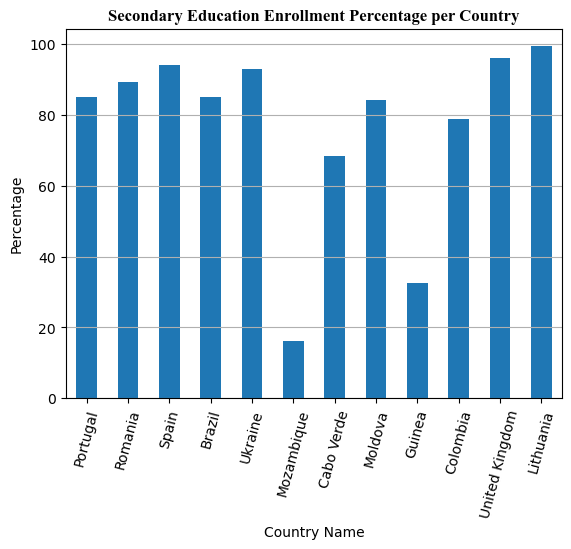

In [13]:
# Bar plot of secondary education 
ax = secondary_educ.plot.bar(x='Country', rot=75)
ax.set_ylabel('Percentage')
ax.grid(axis='y')
plt.title('Secondary Education Enrollment Percentage per Country', fontname="Times New Roman", fontweight="bold")

In [14]:
# Tertiary education Stats ( Top 5) 
tertiary_educ = student_success['Tertiary educ enrollment(all programs)'].drop_duplicates()
tertiary_educ.sort_values(ascending=False).head()

Country Name
Brazil            8072146.00
Turkey            5472521.00
Mexico            3419391.00
Germany           2912203.50
United Kingdom    2352932.75
Name: Tertiary educ enrollment(all programs), dtype: float64

Text(0.5, 1.0, 'Tertiary Education Enrollment Count per Country')

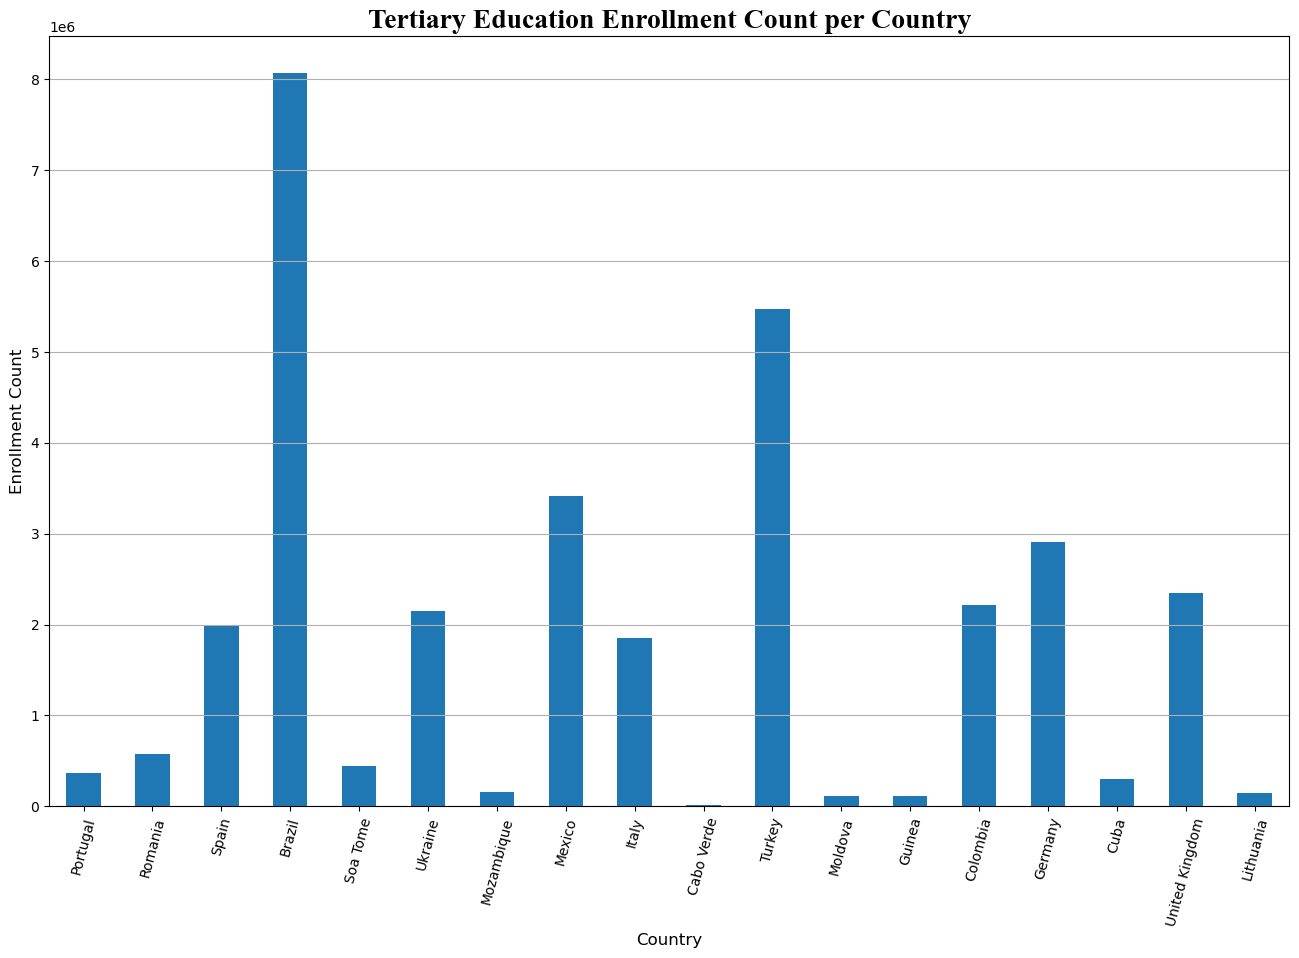

In [16]:
# Bar plot of Tertiary education 
ax = tertiary_educ.plot.bar(x='Country', rot=75, figsize=(16,10))
ax.set_ylabel('Enrollment Count', fontsize=12)
ax.set_xlabel('Country',fontsize=12)
ax.grid(axis='y')
plt.title('Tertiary Education Enrollment Count per Country', fontname="Times New Roman", fontweight="bold", fontsize=20)

###### Graduates, Drop-Outs, Enrolled 

In [17]:
student_data['Target'].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

In [18]:
student_data['graduated'] = (student_data['Target']== 'Graduate').astype(int)

###### Students Stats by Nationality 

In [19]:
# Nationalites: 1 - Portuguese; 2 - German; 6 - Spanish; 11 - Italian; 13 - Dutch; 14 - English; 17 - Lithuanian; 21 - Angolan; 22 - Cape Verdean; 24 - Guinean; 25 - Mozambican; 26 - Santomean; 32 - Turkish; 41 - Brazilian; 62 - Romanian; 100 - Moldova (Republic of); 101 - Mexican; 103 - Ukrainian; 105 - Russian; 108 - Cuban; 109 - Colombian
grad_per_nationality = student_data.groupby('Nacionality')['graduated'].agg('mean')
grad_per_nationality

Nacionality
1      0.499536
2      1.000000
6      0.307692
11     1.000000
13     1.000000
14     1.000000
17     0.000000
21     0.000000
22     0.615385
24     0.800000
25     0.500000
26     0.571429
32     0.000000
41     0.473684
62     0.500000
100    0.000000
101    0.500000
103    0.666667
105    0.000000
108    0.000000
109    0.000000
Name: graduated, dtype: float64

Text(0.5, 1.0, 'Graduate Percentages Per Country')

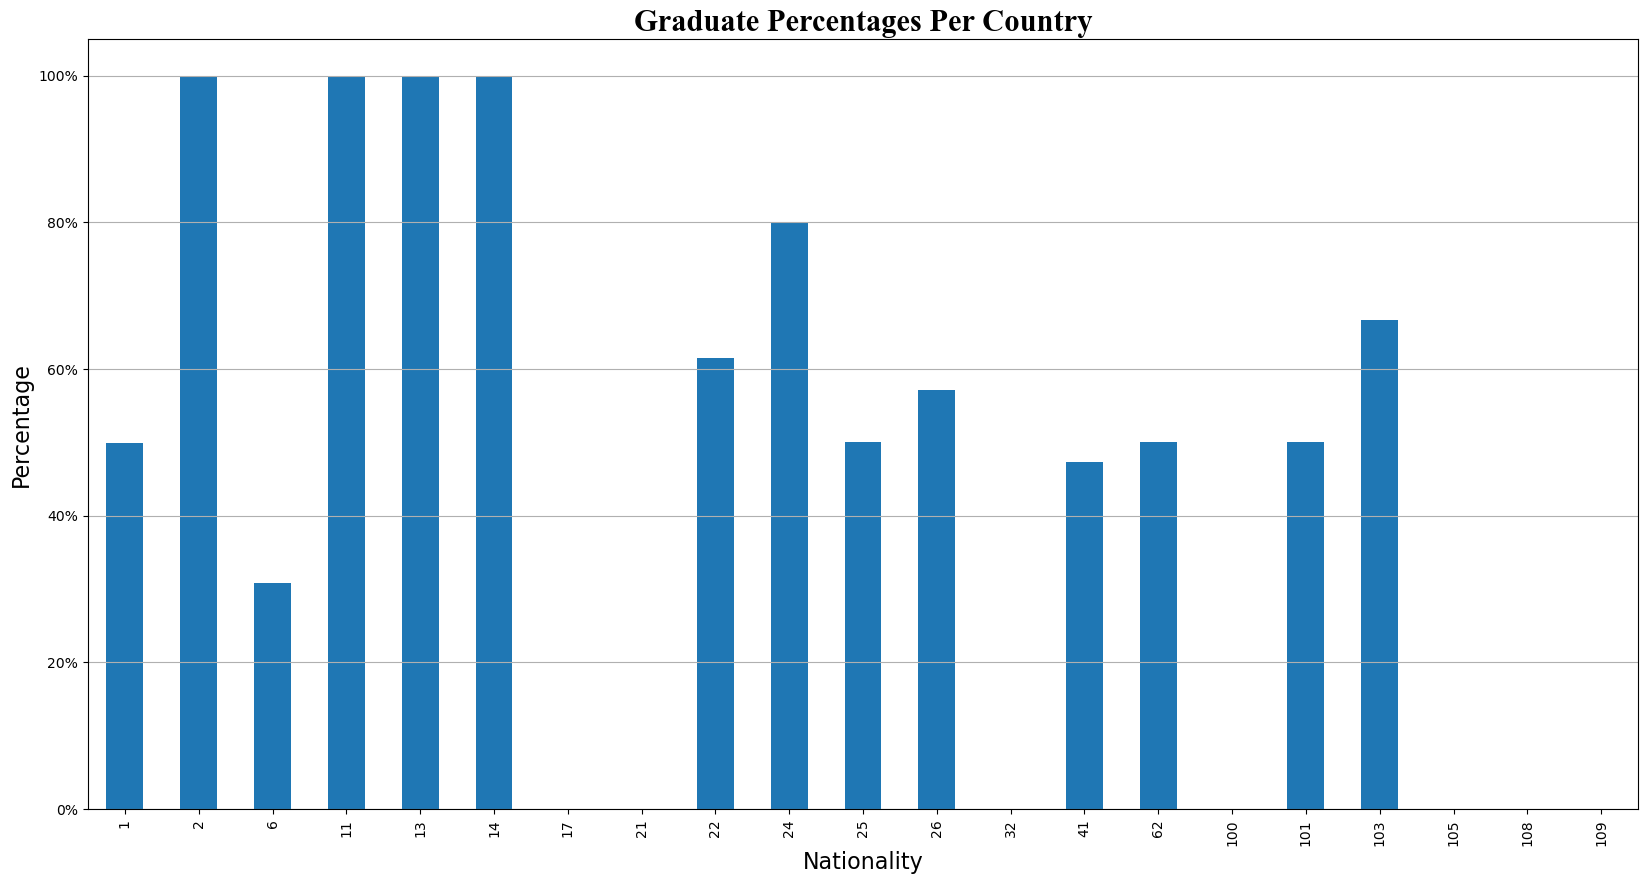

In [20]:
import matplotlib.ticker as mtick

ax = grad_per_nationality.plot(kind='bar', figsize=(20,10))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.grid(axis='y')
plt.ylabel('Percentage', fontsize=16)
plt.xlabel('Nationality', fontsize=16)
plt.title('Graduate Percentages Per Country', fontname="Times New Roman", fontweight="bold", fontsize=22)

###### Enrollment Age 

In [21]:
enroll_age = student_data.groupby('Age at enrollment')['graduated'].agg('mean')
enroll_age

Age at enrollment
17    0.600000
18    0.638996
19    0.600439
20    0.544240
21    0.493789
22    0.454023
23    0.398148
24    0.343511
25    0.268817
26    0.244681
27    0.263736
28    0.253012
29    0.242424
30    0.265306
31    0.218182
32    0.377049
33    0.377778
34    0.316667
35    0.306122
36    0.314286
37    0.333333
38    0.206897
39    0.394737
40    0.260870
41    0.483871
42    0.307692
43    0.440000
44    0.428571
45    0.227273
46    0.500000
47    0.277778
48    0.090909
49    0.384615
50    0.312500
51    0.285714
52    1.000000
53    0.428571
54    0.285714
55    0.400000
57    0.500000
58    0.333333
59    0.333333
60    1.000000
61    0.000000
62    1.000000
70    0.000000
Name: graduated, dtype: float64

Text(0.5, 1.0, 'Graduate Percentage Based on Age of Enrollment')

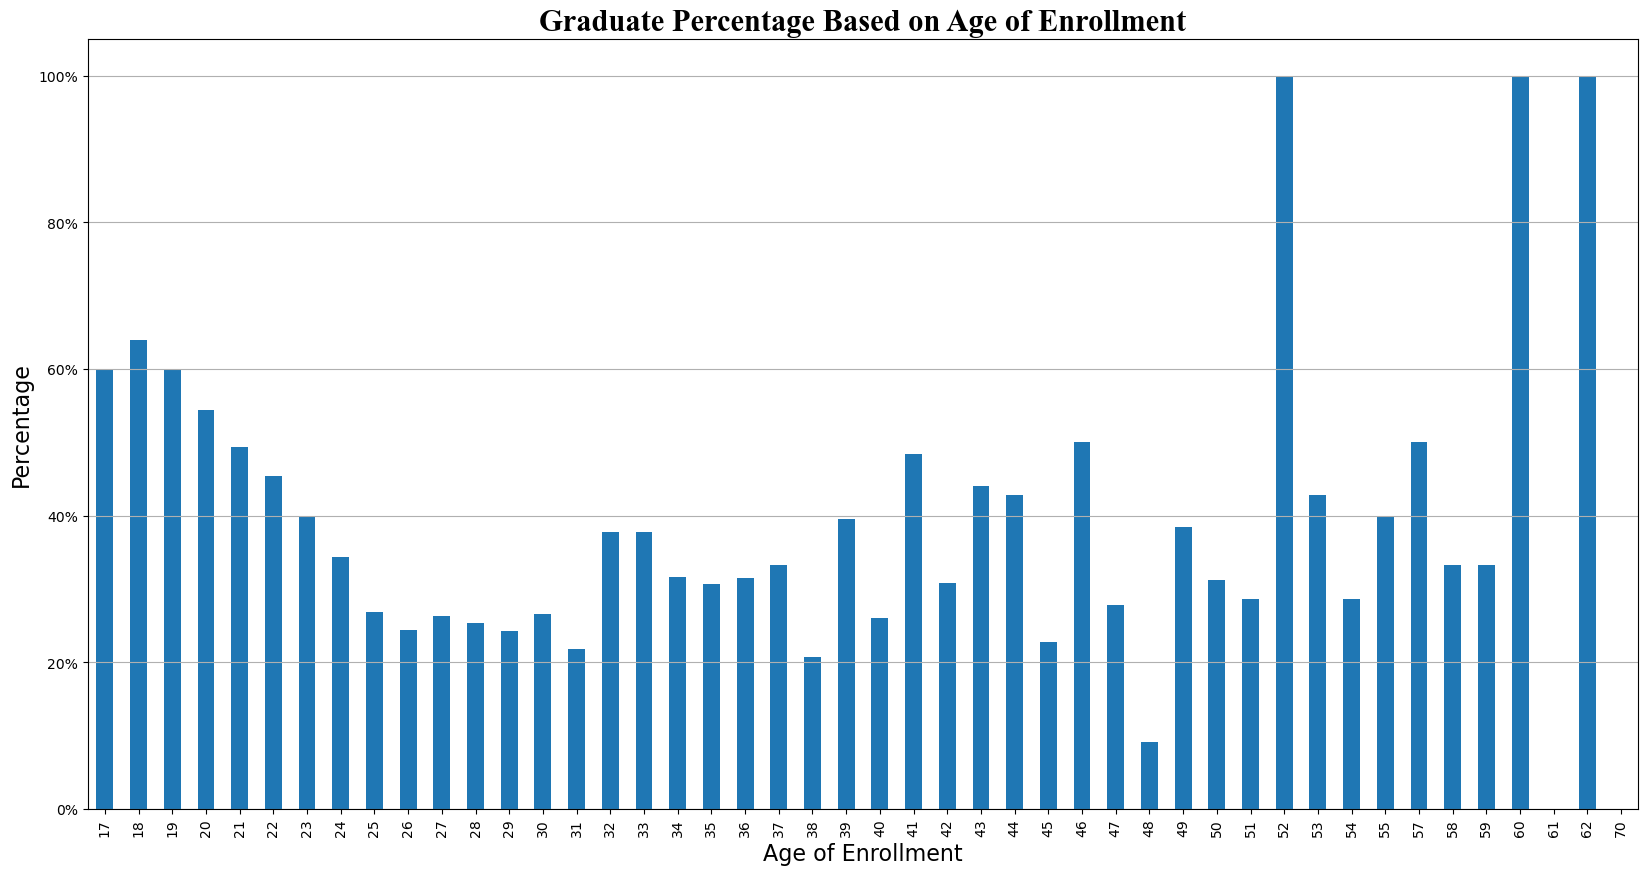

In [22]:
ax = enroll_age.plot(kind='bar', figsize=(20,10))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.grid(axis='y')
ax.set_ylabel('Percentage', fontsize=16)
ax.set_xlabel('Age of Enrollment',fontsize=16)
plt.title('Graduate Percentage Based on Age of Enrollment', fontname="Times New Roman", fontweight="bold", fontsize=22)

###### Gender Stats 

In [23]:
# Graduated: Yes: 1, No: 0 
# Gender: female student = 0 , male students = 1 
grads_by_gender = student_data.groupby('Gender')['graduated'].value_counts()
grads_by_gender

Gender  graduated
0       1            1661
        0            1207
1       0            1008
        1             548
Name: graduated, dtype: int64

In [24]:
gender = student_data.groupby('Gender')['graduated'].agg('mean')
gender

Gender
0    0.579149
1    0.352185
Name: graduated, dtype: float64

Text(0.5, 1.0, 'Graduate Rate per Gender')

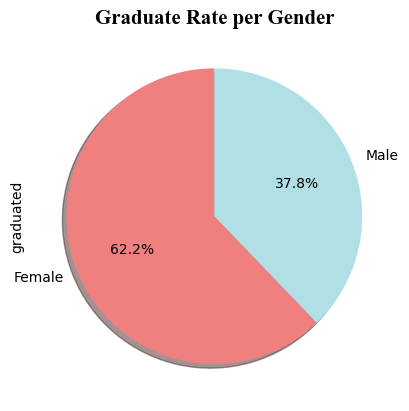

In [25]:
# Pie chart of graduates per gender 
gender.plot(kind='pie', labels=("Female","Male"), autopct='%1.1f%%',shadow=True, startangle=90, colors=['lightcoral','powderblue'])
plt.title('Graduate Rate per Gender', fontname="Times New Roman", fontweight="bold", fontsize=15)

###### Admissiom grades 

In [26]:
student_data.groupby('Admission grade')['graduated'].agg('mean')

Admission grade
95.0     0.272727
95.1     0.000000
95.5     0.500000
95.8     0.000000
96.0     0.000000
           ...   
180.4    0.000000
183.5    0.000000
184.0    1.000000
184.4    1.000000
190.0    0.333333
Name: graduated, Length: 620, dtype: float64

In [27]:
median = student_data.groupby('Admission grade')['graduated'].median

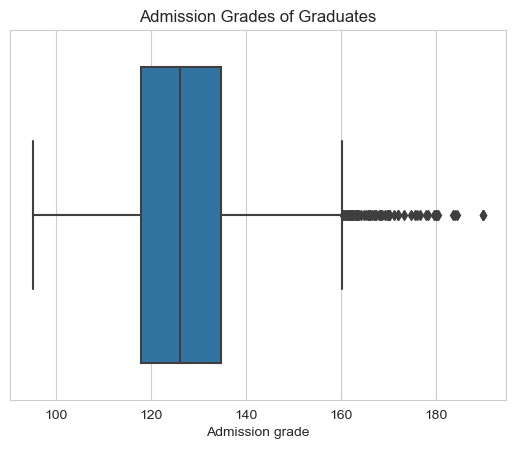

In [28]:
# Admission grade (between 0 and 200)
sns.set_style('whitegrid')
sns.boxplot(x=student_data['Admission grade']).set(title="Admission Grades of Graduates");


###### Curricular units 2nd sem (grade)

In [29]:
second_sem_grades = student_data.groupby( "Curricular units 2nd sem (grade)")['graduated'].agg('mean') 
second_sem_grades

Curricular units 2nd sem (grade)
0.000000     0.086207
10.000000    0.038961
10.166667    0.250000
10.200000    0.250000
10.250000    0.100000
               ...   
17.587500    1.000000
17.600000    0.500000
17.692308    1.000000
17.714286    0.000000
18.571429    1.000000
Name: graduated, Length: 782, dtype: float64

In [30]:
second_sem_grades = pd.DataFrame(second_sem_grades)

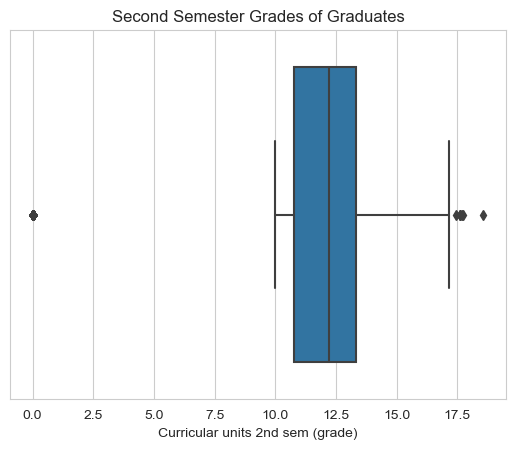

In [31]:
# Graph, add annotation 
# Admission grade (between 0 and 200)
sns.set_style('whitegrid')
sns.boxplot(x=student_data['Curricular units 2nd sem (grade)']).set(title="Second Semester Grades of Graduates");

###### Scholarship holder 

In [32]:
# Graduated: Yes: 1, No: 0 
# Scholarship holder: Yes: 1, No: 0.                
student_data.groupby( "Scholarship holder")['graduated'].value_counts()

Scholarship holder  graduated
0                   0            1951
                    1            1374
1                   1             835
                    0             264
Name: graduated, dtype: int64

In [33]:
# # Scholarship holder: 1 – yes 0, – no
scholarship = student_data.groupby( "Scholarship holder")['graduated'].agg('mean')
scholarship

Scholarship holder
0    0.413233
1    0.759782
Name: graduated, dtype: float64

Text(0.5, 1.0, 'Scholarship Holders vs Non-Scholarship Graduate Percentage')

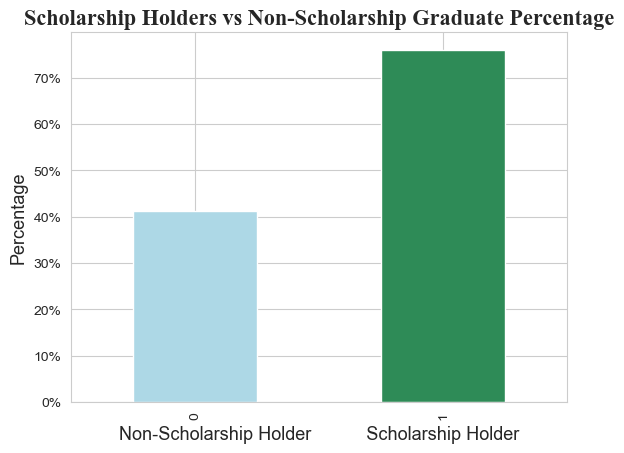

In [34]:
ax = scholarship.plot(kind='bar', color=['lightblue','seagreen'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_ylabel('Percentage', fontsize=13)
ax.set_xlabel('Non-Scholarship Holder           Scholarship Holder', fontsize=13)
plt.title('Scholarship Holders vs Non-Scholarship Graduate Percentage', fontname="Times New Roman", fontweight="bold", fontsize=16)

###### Parental Occupation 

In [35]:
# Mother's occupation grads
# 0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 122 - Health professionals 123 - teachers 125 - Specialists in information and communication technologies (ICT) 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 171 - Skilled construction workers and the like, except electricians 173 - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like 175 - Workers in food processing, woodworking, clothing and other industries and crafts 191 - cleaning workers 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistant
mothers_occ = student_data.groupby( "Mother's occupation")['graduated'].agg('mean')


Text(0.5, 1.0, "Graduate Percentage per Mother's Occupation")

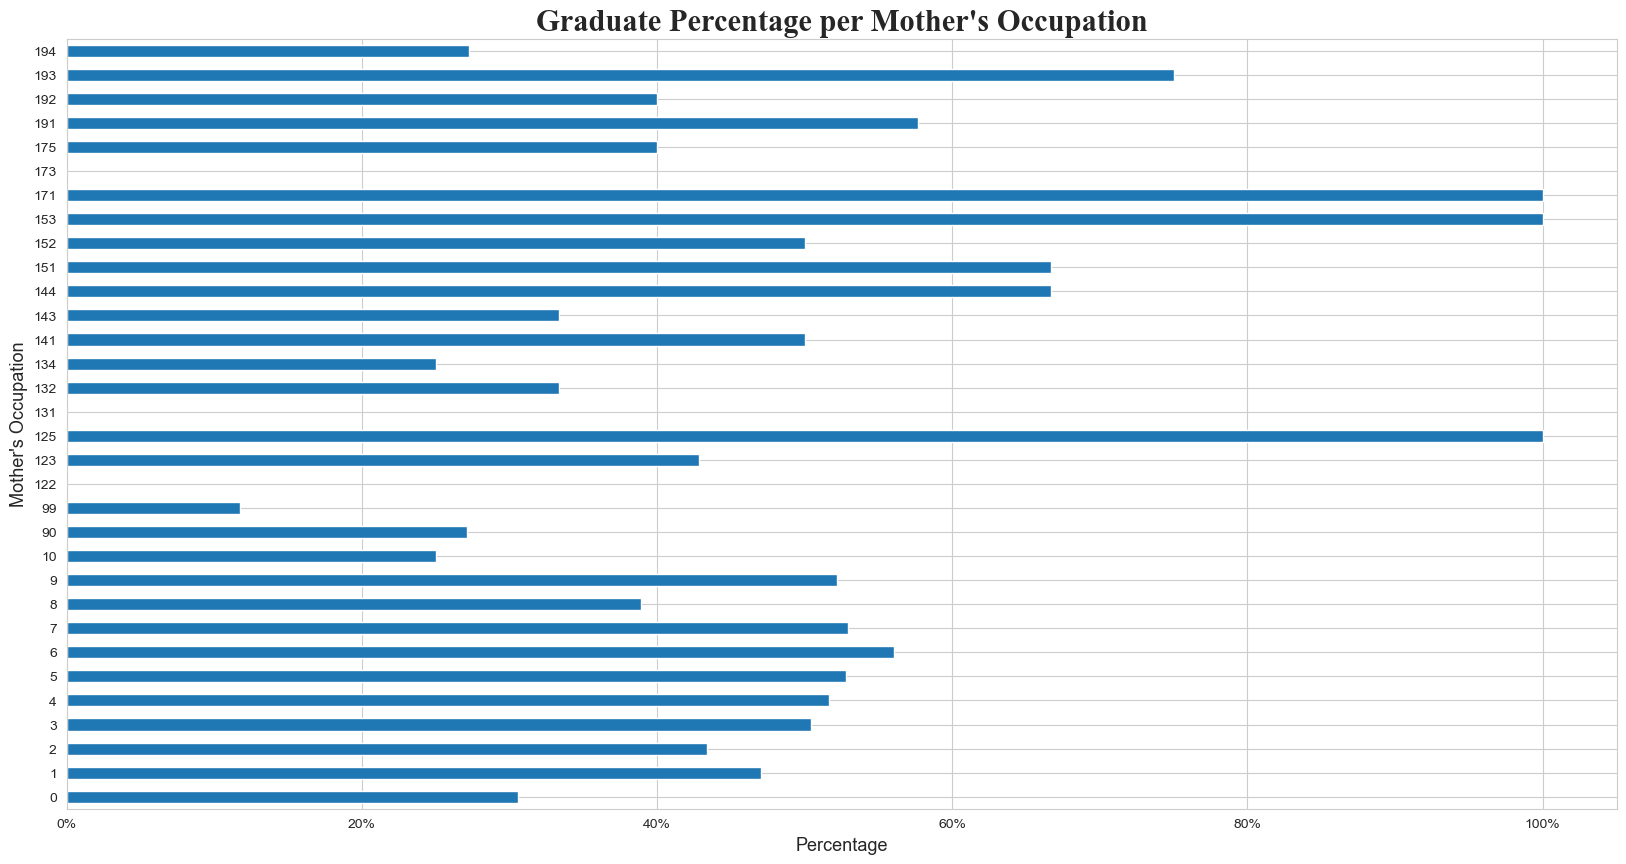

In [36]:
# Graph of Mother's Occupation 
ax = mothers_occ.plot(kind='barh', figsize=(20,10))
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_xlabel('Percentage', fontsize=13)
ax.set_ylabel( "Mother's Occupation", fontsize=13)
plt.title("Graduate Percentage per Mother's Occupation", fontname="Times New Roman", fontweight="bold", fontsize=22)


In [37]:
# Father's Occcupation Grads 
# Ledger: 0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 101 - Armed Forces Officers 102 - Armed Forces Sergeants 103 - Other Armed Forces personnel 112 - Directors of administrative and commercial services 114 - Hotel, catering, trade and other services directors 121 - Specialists in the physical sciences, mathematics, engineering and related techniques 122 - Health professionals 123 - teachers 124 - Specialists in finance, accounting, administrative organization, public and commercial relations 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 135 - Information and communication technology technicians 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 154 - Protection and security services personnel 161 - Market-oriented farmers and skilled agricultural and animal production workers 163 - Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence 171 - Skilled construction workers and the like, except electricians 172 - Skilled workers in metallurgy, metalworking and similar 174 - Skilled workers in electricity and electronics 175 - Workers in food processing, woodworking, clothing and other industries and crafts 181 - Fixed plant and machine operators 182 - assembly workers 183 - Vehicle drivers and mobile equipment operators 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants 195 - Street vendors (except food) and street service providers	
fathers_occ = student_data.groupby( "Father's occupation")['graduated'].agg('mean')


Text(0.5, 1.0, "Graduate P per Father's Occupation")

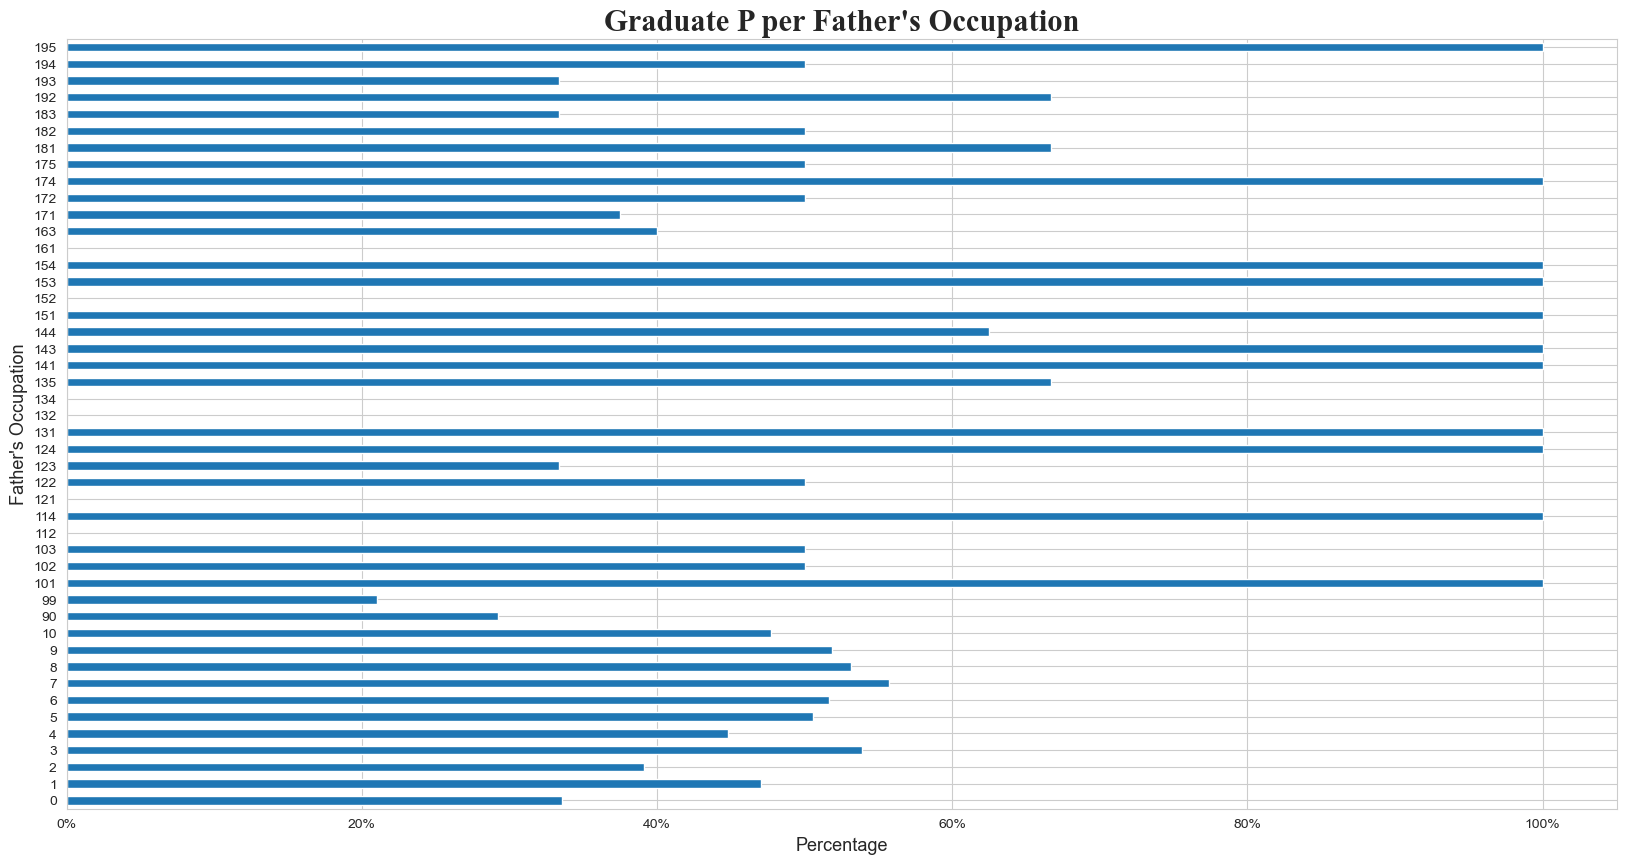

In [38]:
# Graph of Father's Occupation 
ax = fathers_occ.plot(kind='barh', figsize=(20,10))
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_xlabel('Percentage', fontsize=13)
ax.set_ylabel( "Father's Occupation", fontsize=13)
plt.title("Graduate P per Father's Occupation", fontname="Times New Roman", fontweight="bold", fontsize=22)


###### Marital Status 

In [39]:
marital_status = student_data.groupby( "Marital status")['graduated'].agg('mean')
marital_status

Marital status
1    0.514162
2    0.390501
3    0.250000
4    0.362637
5    0.440000
6    0.166667
Name: graduated, dtype: float64

Text(0.5, 1.0, 'Percentage of Graduates per Marital Status')

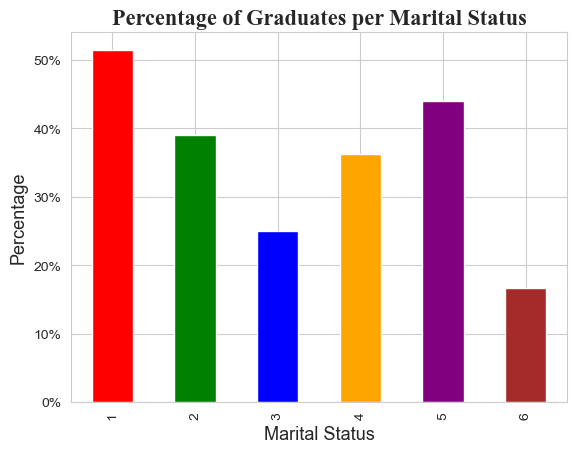

In [40]:
# Graph, add ledger 
# 1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated
ax = marital_status.plot(kind='bar',color=['red', 'green', 'blue', 'orange', 'purple','brown'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_ylabel("Percentage", fontsize=13) 
ax.set_xlabel("Marital Status", fontsize=13) 
plt.title("Percentage of Graduates per Marital Status", fontname="Times New Roman", fontweight="bold", fontsize=16)


# Summary 

First focused on the education enrollment of each country, focusing on secondary and tertiary education. In lower secondary enrollment, Lithuania came first with 99.41%, the United Kingdom second with 96.08%, and Spain in third with 94.08%. Mozambique had the lowest secondary enrollment with less than 20%. When analyzing tertiary education enrollment, Brazil had the highest enrollment with 8,072,146 students. Turkey came second with an enrollment of 5,472,521 students, and Mexico with the third highest enrollment of 3,419,391 students. It was not a surprise to see that Portugal was on the lower end of tertiary education enrollment as a majority of the participants were from Portugal. Indicating a possibility that most students in Portugal seek tertiary education outside of Portugal.  


Based on the graduate data, students from Germany, Italy, and Dutch had the highest graduate percentage. Spain had the lowest graduate percentage with 30%. Note as this percentage may not be a true indicator as the majority of the participants were from Portugal. Moldova, Ukraine, Italy, Russia, Romania, Angola, Mozambique, Mexico, Germany, Lithuania, Cuba, Turkey, Colombia, and the United Kingdom had less than 5 participants. Next looking at the age of enrollment which ranged from 17 up until 70. No particular trend was noted in the age of enrollment, all ages expect 45, 61, and 70 reach 20% or higher. Females showed a higher graduation rate of 62.2% compared to males which had 37.8%. When analyzing admission which ranged from 0 to 200, no pattern was noted, indicating that admission grade is not an affecting factor for graduates. Also possessing the question is if grades are a turning factor for graduates. To further investigate this I choose to look into the curricular units 2nd semester grades. No relationship was shown between the graduates and 2nd-semester grades. Scholarship holders had a 75% graduate rate, almost twice as many graduates when compared to non-scholarship holders. 

Participants whose mothers were skilled construction workers except for electricians, personal care workers, and specialists in information and communication technologies (ICT) had the highest graduation rate which was over 80%. Participants whose fathers were (195) Street vendors (except food) and street service providers, (174) Skilled workers in electricity and electronics, (154) Protection and security services personnel, (101)Armed Forces Officers, (114) Hotel, catering, trade, and other services directors, (134) intermediate level science and engineering technicians, and professions , and (124) specialists in finance. 

Lastly, I looked at the marital status of each graduate. Students who were single had the highest graduation rate with 51% while legally separated students had the lowest with 16% 
